# Ответы на предварительные вопросы к модулю 4 "Авиарейсы без потерь"

## Диаграмма схемы данных

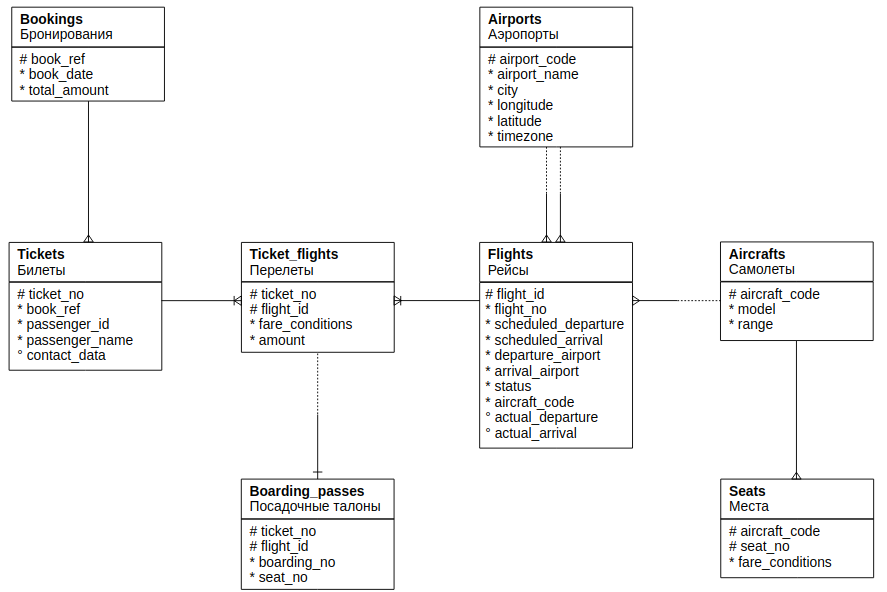

## 4. Изучаем закономерности в данных

Задание 4.1

База данных содержит список аэропортов практически всех крупных городов России. В большинстве городов есть только один аэропорт. Исключение составляет:

In [ ]:
SELECT a.city,
       count(a.city) airp_count
FROM dst_project.Airports a
GROUP BY 1
ORDER BY 2 DESC

Ответ : Moscow, Ulyanovsk

Задание 4.2

Вопрос 1. Таблица рейсов содержит всю информацию о прошлых, текущих и запланированных рейсах. Сколько всего статусов для рейсов определено в таблице?

In [ ]:
SELECT count(DISTINCT f.status) status_count
FROM dst_project.Flights f

Ответ:  6

Это :
    
Departed,
Arrived,
On Time,
Cancelled,
Delayed,
Scheduled

Вопрос 2. Какое количество самолетов находятся в воздухе на момент среза в базе (статус рейса «самолёт уже вылетел и находится в воздухе»).

In [ ]:
SELECT count(f.aircraft_code)
FROM dst_project.Flights f
WHERE f.status = 'Departed'

Ответ : 58 рейсов находятся в воздухе на момент среза в базе

Вопрос 3. Места определяют схему салона каждой модели. Сколько мест имеет самолет модели 773  (Boeing 777-300)?

In [ ]:
SELECT count(s.seat_no)
FROM dst_project.Seats s
WHERE s.aircraft_code = '773'

Ответ: 402 места

Вопрос 4. Сколько состоявшихся (фактических) рейсов было совершено между 1 апреля 2017 года и 1 сентября 2017 года?

In [ ]:
SELECT count(f.flight_id)
FROM dst_project.Flights f
WHERE f.status = 'Arrived'
  AND (f.actual_arrival BETWEEN '2017-04-01' AND '2017-09-02')

Ответ : 74227 рейсов было совершено между 1 апреля 2017 года и 1 сентября 2017 года.

Задание 4.3

Вопрос 1. Сколько всего рейсов было отменено по данным базы?

In [ ]:
SELECT count(DISTINCT f.flight_id)
FROM dst_project.Flights f
WHERE f.status = 'Cancelled'

Ответ : 437 рейсов было отменено по данным базы

Вопрос 2. Сколько самолетов моделей типа Boeing, Sukhoi Superjet, Airbus находится в базе авиаперевозок?

SELECT count(DISTINCT a.model) AS Boeing_count,
       count(DISTINCT b.model) AS Sukhoi_Superjet_count,
       count(DISTINCT c.model) AS Airbus_count
FROM
  (SELECT s.model AS model
   FROM dst_project.Aircrafts s
   WHERE s.model like'Boeing%'
   GROUP BY 1) a
CROSS JOIN
  (SELECT s.model AS model
   FROM dst_project.Aircrafts s
   WHERE s.model like'Sukhoi Superjet%'
   GROUP BY 1) b
CROSS JOIN
  (SELECT s.model AS model
   FROM dst_project.Aircrafts s
   WHERE s.model like'Airbus%'
   GROUP BY 1) c

Ответ :Boeing -3
       Sukhoi Superjet - 1
        Airbus - 3 

Вопрос 3. В какой части (частях) света находится больше аэропортов?

In [ ]:
WITH aitport_world AS ( SELECT 'Australia' as part_of_world,
           count (ap.airport_code) as count_airport
    FROM dst_project.airports as ap
    where ap.timezone like 'Australia/%'
    union all
    SELECT 'Asia' as part_of_world,
           count (ap.airport_code) as count_airport
    FROM dst_project.airports as ap
    where ap.timezone like 'Asia/%'
    union all
    SELECT 'America' as part_of_world,
           count (ap.airport_code) as count_airport
    FROM dst_project.airports as ap
    where ap.timezone like 'America/%'
    union all
    SELECT 'Antarctica' as part_of_world,
           count (ap.airport_code) as count_airport
    FROM dst_project.airports as ap
    where ap.timezone like 'Antarctica/%'
    union all
    SELECT 'Africa' as part_of_world,
           count (ap.airport_code) as count_airport
    FROM dst_project.airports as ap
    where ap.timezone like 'Africa/%'
    union all
    SELECT 'Europe' as part_of_world,
           count (ap.airport_code) as count_airport
    FROM dst_project.airports as ap
    where ap.timezone like 'Europe/%')
SELECT part_of_world,
       count_airport
FROM aitport_world
WHERE count_airport = (SELECT max(count_airport) FROM aitport_world)

Ответ : Europe - 52, Asia - 52

Вопрос 4. У какого рейса была самая большая задержка прибытия за все время сбора данных? Введите id рейса (flight_id).

In [ ]:
SELECT a.flight_id,
       a.actual_arrival aa_times,
       a.scheduled_arrival sa_times,
       (a.actual_arrival - a.scheduled_arrival) time_delta
FROM dst_project.flights a
WHERE actual_arrival IS NOT NULL
GROUP BY 1
ORDER BY 4 DESC
LIMIT 1

Ответ : flight_id=157571


Задание 4.4

Вопрос 1. Когда был запланирован самый первый вылет, сохраненный в базе данных?

In [ ]:
select
    min(f.scheduled_departure)
from
    dst_project.flights f


Ответ: 14.08.2016

Вопрос 2. Сколько минут составляет запланированное время полета в самом длительном рейсе?

In [ ]:
SELECT date_part('hour', a.sa_times - a.sd_times) * 60 + date_part('minute', a.sa_times - a.sd_times) fligt_time
FROM
  (SELECT f.flight_id,
          f.scheduled_arrival sa_times,
          f.scheduled_departure sd_times,
          (f.scheduled_arrival - f.scheduled_departure) time_delta
   FROM dst_project.flights f
   WHERE scheduled_arrival IS NOT NULL
   GROUP BY 1
   ORDER BY 4 DESC
   LIMIT 1)a

Ответ : 530 минут

Вопрос 3. Между какими аэропортами пролегает самый длительный по времени запланированный рейс?

In [ ]:
SELECT f.flight_id,
       f.scheduled_arrival sa_times,
       f.scheduled_departure sd_times,
       (f.scheduled_arrival - f.scheduled_departure) time_delta,
       f.departure_airport,
       f.arrival_airport
FROM dst_project.flights f
WHERE scheduled_arrival IS NOT NULL
GROUP BY 1
ORDER BY 4 DESC
LIMIT 1

Ответ : DME-UUS

Вопрос 4. Сколько составляет средняя дальность полета среди всех самолетов в минутах? Секунды округляются в меньшую сторону (отбрасываются до минут).

In [ ]:
SELECT avg(date_part('hour', a.aa_times - a.ad_times) * 60 + date_part('minute', a.aa_times - a.ad_times)) fligt_time
FROM
  (SELECT f.flight_id,
          f.actual_arrival aa_times,
          f.actual_departure ad_times,
          avg(f.actual_arrival - f.actual_departure) time_delta
   FROM dst_project.flights f
   WHERE f.actual_arrival IS NOT NULL
   GROUP BY 1)a

Ответ : 128 минут (128.35)

Задание 4.5

Вопрос 1. Мест какого класса у SU9 больше всего?

In [ ]:
SELECT max(DISTINCT fare_conditions)
FROM dst_project.seats
WHERE aircraft_code = 'SU9'

Ответ : Economy

Вопрос 2. Какую самую минимальную стоимость составило бронирование за всю историю?

In [ ]:
select
    min(total_amount)
from
    dst_project.Bookings

2 вариант:

In [ ]:
select
    total_amount
from
    dst_project.Bookings
group by 1
order by 1
limit 1

Ответ : 3400

Вопрос 3. Какой номер места был у пассажира с id = 4313 788533?

In [ ]:
SELECT b.seat_no
FROM dst_project.Tickets t
JOIN dst_project.Boarding_passes b ON t.ticket_no = b.ticket_no
WHERE t.passenger_id = '4313 788533'

Ответ : 2A

## 5. Предварительный анализ

Задание 5.1

Вопрос 1. Анапа — курортный город на юге России. Сколько рейсов прибыло в Анапу за 2017 год?

In [ ]:
SELECT count(f.actual_arrival)
FROM dst_project.Flights f
WHERE f.arrival_airport = 'AAQ'
  AND f.actual_arrival BETWEEN '2017-01-01' AND '2018-01-01'

Ответ : 486 рейса прибыло

Вопрос 2. Сколько рейсов из Анапы вылетело зимой 2017 года?

In [ ]:
SELECT count(f.actual_departure)
FROM dst_project.Flights f
WHERE f.departure_airport = 'AAQ'
  AND ((f.actual_departure BETWEEN '2017-01-01' AND '2017-03-01')
       OR (f.actual_departure BETWEEN '2017-12-01' AND '2018-01-01'))

Ответ : 127

Вопрос 3. Посчитайте количество отмененных рейсов из Анапы за все время.

In [ ]:
SELECT count(f.flight_id)
FROM dst_project.Flights f
WHERE f.departure_airport = 'AAQ'
  AND f.status = 'Cancelled'

Ответ : 1

Вопрос 4. Сколько рейсов из Анапы не летают в Москву?

In [ ]:
SELECT count(f.flight_id)
FROM dst_project.Flights f
WHERE f.departure_airport = 'AAQ'
  AND f.arrival_airport not in ('SVO',
                                'DME',
                                'VKO')

Ответ : 453

Вопрос 5. Какая модель самолета летящего на рейсах из Анапы имеет больше всего мест?

In [ ]:
SELECT a.model
FROM
  (SELECT f.flight_id,
          count(s.seat_no),
          r.model
   FROM dst_project.flights f
   JOIN dst_project.Aircrafts r ON f.aircraft_code=r.aircraft_code
   JOIN dst_project.Seats s ON f.aircraft_code=s.aircraft_code
   WHERE f.departure_airport = 'AAQ'
   GROUP BY 1,
            3
   ORDER BY 2 DESC
   LIMIT 1) a

Ответ : Boeing 737-300

In [ ]:
Составим запрос для создания датасета чтобы определить убыточные рейсы из Анапы зимой 2017 года 
сохраним его в формате csv 

In [ ]:
select -- Выведем необходимые колонки:
    f.flight_id,-- идентификатор рейса
    f.flight_no,-- номер рейса
    s.model,    -- модель самолета
    f.departure_airport,   -- аэропорт вылета, в нашем случае это будет Анапа 
    f.arrival_airport,     -- аэропорт прилета
    f.actual_departure,    -- фактические дата и время вылета 
    count(tf.ticket_no) count_ticket, -- количество купленных билетов на рейс
    count(bp.seat_no) count_seat_no,  -- количество занятых мест по посадочным талонам (количество человек)
    (date_part('hour', f.actual_arrival - f.actual_departure) * 60
     + date_part('minute', f.actual_arrival - f.actual_departure)) / 60 time_fl, -- время перелета в часах
    sum(tf.amount) Total_amount   -- общая сумма вырученная за рейс (по купленным билетам)
FROM dst_project.Flights f        -- Присоединим к таблице рейсов другие таблицы:    
    join dst_project.Airports a on f.departure_airport = a.airport_code        -- данные аэропортов
        join dst_project.Ticket_flights tf on f.flight_id = tf.flight_id       -- перелеты
        join dst_project.Aircrafts s on f.aircraft_code = s.aircraft_code      -- самолетов
        LEFT JOIN dst_project.boarding_passes bp ON tf.flight_id = bp.flight_id   -- посадочных талонов(не только по flight_id
                                                 AND tf.ticket_no = bp.ticket_no  -- но и по  № билета, иначе количество
                                                                                  -- билетов станет больше мест в самолете)

WHERE departure_airport = 'AAQ'    -- ограничиваем выдачу по аэропорту города Анапа и декабрь 2016г,январь и февраль 2017
   AND (date_trunc('month', scheduled_departure) in ('2017-01-01','2017-02-01', '2016-12-01'))--так как данные до сентября 2017
    AND status not in ('Cancelled')         -- и не отмененые рейсы                                                     
group by 1, 3      --группируем по идентификатору рейса и модели самолета
order by 5, 6      --сортируем по аэропорту прилета и фактической дате вылета



In [ ]:
Название сохраненного файла: 'query_result_2021-12-29T05_21_17.69909Z.csv'